In [33]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")


In [34]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [35]:
print(train.columns)
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [37]:
train.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
train['label'] = 'training_data'
test['label'] = 'testing_data'
data = pd.concat([train, test], ignore_index = True)
data


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,label
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,training_data
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,training_data
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,training_data
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,training_data
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,training_data
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,training_data
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,training_data
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,training_data
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,training_data
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,training_data


In [39]:
data.apply(lambda x : sum(x.isnull())) # ignoring 'Item_Outlet_Sales'

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
label                           0
dtype: int64

In [40]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type' ]
for i in categorical_columns:
    print(i + ': ')
    print(data[i].value_counts())
    print('\n')

Item_Fat_Content: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Item_Type: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Outlet_Establishment_Year: 
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


Outlet_Location_Type: 
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


Outlet_Size: 
Medium    4655
Small

In [41]:
for a, b in data.groupby(by = 'Item_Identifier'):
    print(a)
    print(b[['Item_Weight', 'label', 'Item_Fat_Content',  'Item_Type']])
    print('\n')

DRA12
       Item_Weight          label Item_Fat_Content    Item_Type
118           11.6  training_data          Low Fat  Soft Drinks
1197          11.6  training_data          Low Fat  Soft Drinks
1245          11.6  training_data          Low Fat  Soft Drinks
1693          11.6  training_data               LF  Soft Drinks
7467          11.6  training_data          Low Fat  Soft Drinks
8043          11.6  training_data          Low Fat  Soft Drinks
9023          11.6   testing_data          Low Fat  Soft Drinks
12435          NaN   testing_data          Low Fat  Soft Drinks
13604         11.6   testing_data               LF  Soft Drinks


DRA24
       Item_Weight          label Item_Fat_Content    Item_Type
1148         19.35  training_data          Regular  Soft Drinks
2879           NaN  training_data          Regular  Soft Drinks
4130         19.35  training_data          Regular  Soft Drinks
4416           NaN  training_data          Regular  Soft Drinks
4900         19.35  traini

       Item_Weight          label Item_Fat_Content    Item_Type
322           15.0  training_data          Low Fat  Soft Drinks
3339          15.0  training_data          Low Fat  Soft Drinks
3860          15.0  training_data          Low Fat  Soft Drinks
6582          15.0  training_data          Low Fat  Soft Drinks
7313           NaN  training_data          Low Fat  Soft Drinks
8150          15.0  training_data          Low Fat  Soft Drinks
8332          15.0  training_data          Low Fat  Soft Drinks
12870         15.0   testing_data          Low Fat  Soft Drinks


DRD15
       Item_Weight          label Item_Fat_Content Item_Type
1191          10.6  training_data          Low Fat     Dairy
2950           NaN  training_data          Low Fat     Dairy
3278          10.6  training_data          Low Fat     Dairy
3946          10.6  training_data          Low Fat     Dairy
4079          10.6  training_data          Low Fat     Dairy
4214          10.6  training_data          Low Fat

DRE27
       Item_Weight          label Item_Fat_Content Item_Type
855          11.85  training_data          Low Fat     Dairy
1083         11.85  training_data          Low Fat     Dairy
2125         11.85  training_data          Low Fat     Dairy
2445         11.85  training_data          Low Fat     Dairy
4068         11.85  training_data          Low Fat     Dairy
5663         11.85  training_data          Low Fat     Dairy
11765        11.85   testing_data          low fat     Dairy
12212          NaN   testing_data          Low Fat     Dairy
13419        11.85   testing_data          Low Fat     Dairy


DRE37
       Item_Weight          label Item_Fat_Content    Item_Type
1252           NaN  training_data          Low Fat  Soft Drinks
3625          13.5  training_data          Low Fat  Soft Drinks
5346          13.5  training_data          Low Fat  Soft Drinks
6091          13.5  training_data               LF  Soft Drinks
8047          13.5  training_data          Low Fat  Soft

DRF37
       Item_Weight          label Item_Fat_Content    Item_Type
1463         17.25  training_data          Low Fat  Soft Drinks
5011         17.25  training_data          Low Fat  Soft Drinks
5210         17.25  training_data          Low Fat  Soft Drinks
7459         17.25  training_data          low fat  Soft Drinks
7478           NaN  training_data          Low Fat  Soft Drinks
8506         17.25  training_data          Low Fat  Soft Drinks
9767         17.25   testing_data          Low Fat  Soft Drinks
13573        17.25   testing_data          Low Fat  Soft Drinks
13954          NaN   testing_data          Low Fat  Soft Drinks


DRF48
       Item_Weight          label Item_Fat_Content    Item_Type
2797          5.73  training_data          Low Fat  Soft Drinks
8663          5.73   testing_data          Low Fat  Soft Drinks
9711          5.73   testing_data          Low Fat  Soft Drinks
11354         5.73   testing_data          Low Fat  Soft Drinks
11968         5.73   testi

       Item_Weight          label Item_Fat_Content    Item_Type
34            17.5  training_data          Low Fat  Soft Drinks
1177           NaN  training_data          Low Fat  Soft Drinks
5545          17.5  training_data          Low Fat  Soft Drinks
7186           NaN  training_data          Low Fat  Soft Drinks
7801          17.5  training_data          Low Fat  Soft Drinks
9147          17.5   testing_data          Low Fat  Soft Drinks
10046         17.5   testing_data          Low Fat  Soft Drinks
10109         17.5   testing_data          Low Fat  Soft Drinks
10950         17.5   testing_data          Low Fat  Soft Drinks


DRH03
       Item_Weight          label Item_Fat_Content Item_Type
433            NaN  training_data          Low Fat     Dairy
2449         17.25  training_data          Low Fat     Dairy
3074         17.25  training_data          Low Fat     Dairy
3300         17.25  training_data          low fat     Dairy
6595         17.25  training_data          Low 

       Item_Weight          label Item_Fat_Content    Item_Type
2322           NaN  training_data          Low Fat  Hard Drinks
4161         18.85  training_data          Low Fat  Hard Drinks
4169         18.85  training_data          Low Fat  Hard Drinks
4230         18.85  training_data          Low Fat  Hard Drinks
7479         18.85  training_data          Low Fat  Hard Drinks
7841         18.85  training_data          Low Fat  Hard Drinks
12940        18.85   testing_data          Low Fat  Hard Drinks
13940        18.85   testing_data          Low Fat  Hard Drinks


DRI25
       Item_Weight          label Item_Fat_Content    Item_Type
92            19.6  training_data          Low Fat  Soft Drinks
1452          19.6  training_data          Low Fat  Soft Drinks
4285          19.6  training_data          Low Fat  Soft Drinks
4934          19.6  training_data          Low Fat  Soft Drinks
6023          19.6  training_data               LF  Soft Drinks
6667           NaN  training_dat

       Item_Weight          label Item_Fat_Content Item_Type
244           14.1  training_data          Low Fat     Dairy
3198          14.1  training_data          Low Fat     Dairy
5550          14.1  training_data          Low Fat     Dairy
6138          14.1  training_data          Low Fat     Dairy
6898          14.1  training_data          Low Fat     Dairy
11540          NaN   testing_data          Low Fat     Dairy
12321         14.1   testing_data          Low Fat     Dairy
12386          NaN   testing_data          Low Fat     Dairy
12440         14.1   testing_data          Low Fat     Dairy


DRJ59
       Item_Weight          label Item_Fat_Content    Item_Type
27           11.65  training_data          low fat  Hard Drinks
2484           NaN  training_data          Low Fat  Hard Drinks
3296         11.65  training_data          Low Fat  Hard Drinks
4035         11.65  training_data          Low Fat  Hard Drinks
5049         11.65  training_data          Low Fat  Hard Drink

       Item_Weight          label Item_Fat_Content    Item_Type
165           19.5  training_data          Regular  Soft Drinks
1667          19.5  training_data          Regular  Soft Drinks
2040          19.5  training_data          Regular  Soft Drinks
2065          19.5  training_data          Regular  Soft Drinks
2794           NaN  training_data          Regular  Soft Drinks
4772           NaN  training_data          Regular  Soft Drinks
6098          19.5  training_data          Regular  Soft Drinks
8866          19.5   testing_data          Regular  Soft Drinks
12134         19.5   testing_data          Regular  Soft Drinks
13789         19.5   testing_data          Regular  Soft Drinks


DRL11
       Item_Weight          label Item_Fat_Content    Item_Type
925           10.5  training_data          Low Fat  Hard Drinks
1597          10.5  training_data          Low Fat  Hard Drinks
1774           NaN  training_data          low fat  Hard Drinks
1780          10.5  training_dat

       Item_Weight          label Item_Fat_Content    Item_Type
235            NaN  training_data          Low Fat  Hard Drinks
2891           9.3  training_data          Low Fat  Hard Drinks
3486           9.3  training_data          Low Fat  Hard Drinks
4771           9.3  training_data          Low Fat  Hard Drinks
6089           9.3  training_data          Low Fat  Hard Drinks
7804           9.3  training_data          Low Fat  Hard Drinks
10764          9.3   testing_data          Low Fat  Hard Drinks
11450          9.3   testing_data          Low Fat  Hard Drinks
13991          9.3   testing_data          Low Fat  Hard Drinks


DRM48
       Item_Weight          label Item_Fat_Content    Item_Type
879           15.2  training_data          Low Fat  Soft Drinks
1725          15.2  training_data          Low Fat  Soft Drinks
3660           NaN  training_data          Low Fat  Soft Drinks
5817          15.2  training_data          Low Fat  Soft Drinks
8864          15.2   testing_dat

       Item_Weight          label Item_Fat_Content    Item_Type
1241         7.535  training_data          Low Fat  Soft Drinks
1782         7.535  training_data          Low Fat  Soft Drinks
2522           NaN  training_data          Low Fat  Soft Drinks
4146         7.535  training_data          Low Fat  Soft Drinks
4542         7.535  training_data          Low Fat  Soft Drinks
8814         7.535   testing_data          Low Fat  Soft Drinks
9175         7.535   testing_data          Low Fat  Soft Drinks
11149        7.535   testing_data          Low Fat  Soft Drinks
11433          NaN   testing_data               LF  Soft Drinks
11973        7.535   testing_data          Low Fat  Soft Drinks


FDA01
       Item_Weight          label Item_Fat_Content Item_Type
311           15.0  training_data          Regular    Canned
748           15.0  training_data          Regular    Canned
1860          15.0  training_data          Regular    Canned
5439          15.0  training_data          R

       Item_Weight          label Item_Fat_Content     Item_Type
536          6.695  training_data          Low Fat  Frozen Foods
1627           NaN  training_data          Low Fat  Frozen Foods
4051         6.695  training_data          Low Fat  Frozen Foods
5130         6.695  training_data          Low Fat  Frozen Foods
9597         6.695   testing_data          Low Fat  Frozen Foods
12159        6.695   testing_data          Low Fat  Frozen Foods
13325        6.695   testing_data          Low Fat  Frozen Foods
14136        6.695   testing_data          Low Fat  Frozen Foods


FDA19
       Item_Weight          label Item_Fat_Content              Item_Type
3512          7.52  training_data          Low Fat  Fruits and Vegetables
4108           NaN  training_data          Low Fat  Fruits and Vegetables
4869          7.52  training_data               LF  Fruits and Vegetables
5788          7.52  training_data          Low Fat  Fruits and Vegetables
8365          7.52  training_data    

       Item_Weight          label Item_Fat_Content     Item_Type
2831         14.85  training_data          Regular  Baking Goods
6121         14.85  training_data          Regular  Baking Goods
7381           NaN  training_data          Regular  Baking Goods
7589         14.85  training_data          Regular  Baking Goods
9909         14.85   testing_data          Regular  Baking Goods
12727        14.85   testing_data          Regular  Baking Goods
13435        14.85   testing_data          Regular  Baking Goods
14003        14.85   testing_data          Regular  Baking Goods


FDA36
       Item_Weight          label Item_Fat_Content     Item_Type
471          5.985  training_data          Low Fat  Baking Goods
2598           NaN  training_data          Low Fat  Baking Goods
6483           NaN  training_data          Low Fat  Baking Goods
7241         5.985  training_data          Low Fat  Baking Goods
8532         5.985   testing_data          Low Fat  Baking Goods
8804         5.98

       Item_Weight          label Item_Fat_Content     Item_Type
896           16.2  training_data          Regular  Frozen Foods
4188          16.2  training_data          Regular  Frozen Foods
6575           NaN  training_data          Regular  Frozen Foods
8085          16.2  training_data              reg  Frozen Foods
8257          16.2  training_data          Regular  Frozen Foods
9295          16.2   testing_data          Regular  Frozen Foods
11175         16.2   testing_data          Regular  Frozen Foods
11537         16.2   testing_data          Regular  Frozen Foods
11659         16.2   testing_data          Regular  Frozen Foods
13644          NaN   testing_data          Regular  Frozen Foods


FDA55
       Item_Weight          label Item_Fat_Content              Item_Type
3509          17.2  training_data              reg  Fruits and Vegetables
5404           NaN  training_data          Regular  Fruits and Vegetables
5918          17.2  training_data          Regular  Fru

       Item_Weight          label Item_Fat_Content Item_Type
672           8.21  training_data          Low Fat     Dairy
3043          8.21  training_data          Low Fat     Dairy
3936          8.21  training_data          Low Fat     Dairy
7834          8.21  training_data          Low Fat     Dairy
8330          8.21  training_data          Low Fat     Dairy
9661          8.21   testing_data          Low Fat     Dairy
9954           NaN   testing_data          Low Fat     Dairy
11114         8.21   testing_data          Low Fat     Dairy


FDB17
       Item_Weight          label Item_Fat_Content     Item_Type
421          13.15  training_data          Low Fat  Frozen Foods
1497         13.15  training_data          Low Fat  Frozen Foods
2023         13.15  training_data          Low Fat  Frozen Foods
2107         13.15  training_data          Low Fat  Frozen Foods
4560           NaN  training_data          Low Fat  Frozen Foods
5509         13.15  training_data          Low Fat  F

       Item_Weight          label Item_Fat_Content Item_Type
1045          17.5  training_data          Regular     Dairy
3806          17.5  training_data          Regular     Dairy
4123          17.5  training_data          Regular     Dairy
4636          17.5  training_data          Regular     Dairy
5153           NaN  training_data          Regular     Dairy
7622          17.5  training_data          Regular     Dairy
13448         17.5   testing_data          Regular     Dairy
13773         17.5   testing_data          Regular     Dairy


FDB41
       Item_Weight          label Item_Fat_Content     Item_Type
196           19.0  training_data          Regular  Frozen Foods
2408          19.0  training_data          Regular  Frozen Foods
5269          19.0  training_data          Regular  Frozen Foods
5810          19.0  training_data          Regular  Frozen Foods
6033          19.0  training_data          Regular  Frozen Foods
6869           NaN  training_data          Regular  F

       Item_Weight          label Item_Fat_Content     Item_Type
1459           9.3  training_data          Low Fat  Baking Goods
3063           9.3  training_data          Low Fat  Baking Goods
3239           9.3  training_data          Low Fat  Baking Goods
6233           9.3  training_data          Low Fat  Baking Goods
6525           9.3  training_data          Low Fat  Baking Goods
7282           9.3  training_data          low fat  Baking Goods
9150           9.3   testing_data          Low Fat  Baking Goods
11732          NaN   testing_data          Low Fat  Baking Goods
12034          9.3   testing_data               LF  Baking Goods
12901          NaN   testing_data          Low Fat  Baking Goods


FDC02
       Item_Weight          label Item_Fat_Content Item_Type
43           21.35  training_data          Low Fat    Canned
483          21.35  training_data          Low Fat    Canned
2320           NaN  training_data          Low Fat    Canned
2368         21.35  training_data

       Item_Weight          label Item_Fat_Content      Item_Type
3185          18.0  training_data          Low Fat  Starchy Foods
9328          18.0   testing_data          Low Fat  Starchy Foods
10786         18.0   testing_data          Low Fat  Starchy Foods
11900         18.0   testing_data          Low Fat  Starchy Foods
12507         18.0   testing_data          Low Fat  Starchy Foods
12935         18.0   testing_data          Low Fat  Starchy Foods
13093          NaN   testing_data          Low Fat  Starchy Foods
13104         18.0   testing_data          Low Fat  Starchy Foods


FDC26
       Item_Weight          label Item_Fat_Content Item_Type
983         10.195  training_data          Low Fat    Canned
1008        10.195  training_data          Low Fat    Canned
4984        10.195  training_data          Low Fat    Canned
5073        10.195  training_data          Low Fat    Canned
5366        10.195  training_data          Low Fat    Canned
8568        10.195   testing_dat

       Item_Weight          label Item_Fat_Content              Item_Type
1094          15.6  training_data          Low Fat  Fruits and Vegetables
3708          15.6  training_data          Low Fat  Fruits and Vegetables
4504           NaN  training_data          Low Fat  Fruits and Vegetables
5626          15.6  training_data          Low Fat  Fruits and Vegetables
6967          15.6  training_data          Low Fat  Fruits and Vegetables
7577          15.6  training_data          Low Fat  Fruits and Vegetables
8889          15.6   testing_data          Low Fat  Fruits and Vegetables
13955         15.6   testing_data          Low Fat  Fruits and Vegetables
14191         15.6   testing_data          Low Fat  Fruits and Vegetables


FDC45
       Item_Weight          label Item_Fat_Content              Item_Type
1722          17.0  training_data          Low Fat  Fruits and Vegetables
2439           NaN  training_data          Low Fat  Fruits and Vegetables
4586          17.0  training_d


FDD03
       Item_Weight          label Item_Fat_Content Item_Type
110           13.3  training_data          Low Fat     Dairy
657           13.3  training_data          Low Fat     Dairy
4958          13.3  training_data          Low Fat     Dairy
5078          13.3  training_data          Low Fat     Dairy
6397          13.3  training_data          Low Fat     Dairy
12657         13.3   testing_data          Low Fat     Dairy
12774          NaN   testing_data          Low Fat     Dairy
13219         13.3   testing_data          Low Fat     Dairy


FDD04
       Item_Weight          label Item_Fat_Content Item_Type
986           16.0  training_data          Low Fat     Dairy
1721          16.0  training_data          Low Fat     Dairy
1833          16.0  training_data          Low Fat     Dairy
2482          16.0  training_data          Low Fat     Dairy
6262           NaN  training_data          Low Fat     Dairy
8254          16.0  training_data          Low Fat     Dairy
11256    

FDD23
       Item_Weight          label Item_Fat_Content      Item_Type
4029           9.5  training_data          Regular  Starchy Foods
4156           9.5  training_data          Regular  Starchy Foods
6687           9.5  training_data          Regular  Starchy Foods
8693           9.5   testing_data          Regular  Starchy Foods
9330           9.5   testing_data          Regular  Starchy Foods
9807           NaN   testing_data              reg  Starchy Foods
13170          9.5   testing_data          Regular  Starchy Foods
14174          9.5   testing_data          Regular  Starchy Foods


FDD26
       Item_Weight          label Item_Fat_Content Item_Type
2470          8.71  training_data          Regular    Canned
3819          8.71  training_data          Regular    Canned
3968           NaN  training_data          Regular    Canned
4786          8.71  training_data          Regular    Canned
4848          8.71  training_data          Regular    Canned
7379           NaN  traini

       Item_Weight          label Item_Fat_Content              Item_Type
366           8.05  training_data          Regular  Fruits and Vegetables
1067          8.05  training_data          Regular  Fruits and Vegetables
1541          8.05  training_data          Regular  Fruits and Vegetables
2535          8.05  training_data          Regular  Fruits and Vegetables
4306          8.05  training_data          Regular  Fruits and Vegetables
4854          8.05  training_data          Regular  Fruits and Vegetables
11910         8.05   testing_data          Regular  Fruits and Vegetables
12708          NaN   testing_data          Regular  Fruits and Vegetables


FDD45
       Item_Weight          label Item_Fat_Content              Item_Type
2540         8.615  training_data          low fat  Fruits and Vegetables
5451         8.615  training_data          Low Fat  Fruits and Vegetables
7120         8.615  training_data          Low Fat  Fruits and Vegetables
7647         8.615  training_d

       Item_Weight          label Item_Fat_Content Item_Type
789           8.71  training_data          low fat    Canned
4176          8.71  training_data          Low Fat    Canned
4882          8.71  training_data          Low Fat    Canned
5431           NaN  training_data          Low Fat    Canned
5634           NaN  training_data          Low Fat    Canned
8755          8.71   testing_data          Low Fat    Canned
9318          8.71   testing_data          Low Fat    Canned
10454         8.71   testing_data          Low Fat    Canned
11343         8.71   testing_data               LF    Canned
13525         8.71   testing_data          Low Fat    Canned


FDE04
       Item_Weight          label Item_Fat_Content     Item_Type
188          19.75  training_data          Regular  Frozen Foods
1800         19.75  training_data          Regular  Frozen Foods
2094         19.75  training_data          Regular  Frozen Foods
2323         19.75  training_data          Regular  Frozen Fo

       Item_Weight          label Item_Fat_Content    Item_Type
563            NaN  training_data          Low Fat  Snack Foods
1048         9.695  training_data          Low Fat  Snack Foods
5771         9.695  training_data          Low Fat  Snack Foods
6481         9.695  training_data          Low Fat  Snack Foods
8495         9.695  training_data          Low Fat  Snack Foods
9329         9.695   testing_data          Low Fat  Snack Foods
9496         9.695   testing_data          Low Fat  Snack Foods
12951          NaN   testing_data          Low Fat  Snack Foods
13987        9.695   testing_data          Low Fat  Snack Foods
14128        9.695   testing_data               LF  Snack Foods


FDE23
       Item_Weight          label Item_Fat_Content      Item_Type
2667          17.6  training_data          Regular  Starchy Foods
5610          17.6  training_data          Regular  Starchy Foods
6891          17.6  training_data          Regular  Starchy Foods
7363          17.6  trai

       Item_Weight          label Item_Fat_Content Item_Type
689           7.89  training_data          Low Fat     Dairy
7412          7.89  training_data          Low Fat     Dairy
9924           NaN   testing_data          Low Fat     Dairy
11194         7.89   testing_data          Low Fat     Dairy
11470          NaN   testing_data          Low Fat     Dairy
11809         7.89   testing_data          Low Fat     Dairy
11826         7.89   testing_data          Low Fat     Dairy
13630         7.89   testing_data          Low Fat     Dairy
13842         7.89   testing_data          Low Fat     Dairy


FDE40
       Item_Weight          label Item_Fat_Content Item_Type
198            NaN  training_data          Regular     Dairy
3628          15.6  training_data          Regular     Dairy
4927          15.6  training_data          Regular     Dairy
5561          15.6  training_data          Regular     Dairy
7641           NaN  training_data          Regular     Dairy
9955          15

       Item_Weight          label Item_Fat_Content     Item_Type
249           17.5  training_data          Low Fat  Frozen Foods
1098          17.5  training_data          Low Fat  Frozen Foods
1813          17.5  training_data          Low Fat  Frozen Foods
3429          17.5  training_data          Low Fat  Frozen Foods
4074          17.5  training_data          Low Fat  Frozen Foods
4105           NaN  training_data          Low Fat  Frozen Foods
5968          17.5  training_data          Low Fat  Frozen Foods
8511          17.5  training_data          Low Fat  Frozen Foods
13869          NaN   testing_data          Low Fat  Frozen Foods


FDF08
       Item_Weight          label Item_Fat_Content              Item_Type
785           14.3  training_data          Regular  Fruits and Vegetables
4779          14.3  training_data          Regular  Fruits and Vegetables
6798          14.3  training_data          Regular  Fruits and Vegetables
6911          14.3  training_data          Reg

       Item_Weight          label Item_Fat_Content     Item_Type
338           15.7  training_data          Regular  Frozen Foods
5675           NaN  training_data          Regular  Frozen Foods
7627          15.7  training_data          Regular  Frozen Foods
9692          15.7   testing_data          Regular  Frozen Foods
10041         15.7   testing_data          Regular  Frozen Foods
11144          NaN   testing_data          Regular  Frozen Foods
11808         15.7   testing_data          Regular  Frozen Foods
11908         15.7   testing_data          Regular  Frozen Foods
12268         15.7   testing_data          Regular  Frozen Foods
13653         15.7   testing_data          Regular  Frozen Foods


FDF29
       Item_Weight          label Item_Fat_Content     Item_Type
2436          15.1  training_data          Regular  Frozen Foods
4154          15.1  training_data          Regular  Frozen Foods
4964           NaN  training_data          Regular  Frozen Foods
7358          15.

       Item_Weight          label Item_Fat_Content      Item_Type
1786         20.85  training_data          Low Fat  Starchy Foods
2359         20.85  training_data          Low Fat  Starchy Foods
3246         20.85  training_data          Low Fat  Starchy Foods
6810         20.85  training_data          Low Fat  Starchy Foods
8870           NaN   testing_data          Low Fat  Starchy Foods
13006        20.85   testing_data          Low Fat  Starchy Foods
13153        20.85   testing_data          Low Fat  Starchy Foods
13980        20.85   testing_data          Low Fat  Starchy Foods


FDF50
       Item_Weight          label Item_Fat_Content Item_Type
3476         4.905  training_data          Low Fat    Canned
3633         4.905  training_data          Low Fat    Canned
8131           NaN  training_data          Low Fat    Canned
8704         4.905   testing_data          low fat    Canned
9880         4.905   testing_data          Low Fat    Canned
11075        4.905   testing_dat

       Item_Weight          label Item_Fat_Content     Item_Type
1348         6.865  training_data          Regular  Frozen Foods
1554         6.865  training_data          Regular  Frozen Foods
3709           NaN  training_data          Regular  Frozen Foods
5829         6.865  training_data          Regular  Frozen Foods
8761           NaN   testing_data          Regular  Frozen Foods
12937        6.865   testing_data          Regular  Frozen Foods
13559        6.865   testing_data          Regular  Frozen Foods
13565        6.865   testing_data          Regular  Frozen Foods
13743        6.865   testing_data          Regular  Frozen Foods


FDG20
       Item_Weight          label Item_Fat_Content              Item_Type
85            15.5  training_data          Regular  Fruits and Vegetables
680           15.5  training_data          Regular  Fruits and Vegetables
3287          15.5  training_data          Regular  Fruits and Vegetables
4039          15.5  training_data          Reg

       Item_Weight          label Item_Fat_Content     Item_Type
2136         13.65  training_data          Low Fat  Frozen Foods
2242           NaN  training_data          Low Fat  Frozen Foods
8239         13.65  training_data          Low Fat  Frozen Foods
8359         13.65  training_data          Low Fat  Frozen Foods
9589         13.65   testing_data          Low Fat  Frozen Foods
9941         13.65   testing_data          Low Fat  Frozen Foods
11089        13.65   testing_data          Low Fat  Frozen Foods
11341        13.65   testing_data          Low Fat  Frozen Foods
13539          NaN   testing_data          Low Fat  Frozen Foods
14107        13.65   testing_data          Low Fat  Frozen Foods


FDG41
       Item_Weight          label Item_Fat_Content     Item_Type
2027          8.84  training_data          Regular  Frozen Foods
2544          8.84  training_data          Regular  Frozen Foods
4828          8.84  training_data          Regular  Frozen Foods
8272          8.8

       Item_Weight          label Item_Fat_Content     Item_Type
2589           NaN  training_data          Low Fat  Baking Goods
3075         20.35  training_data          Low Fat  Baking Goods
4757         20.35  training_data          Low Fat  Baking Goods
7518         20.35  training_data          Low Fat  Baking Goods
7688         20.35  training_data          Low Fat  Baking Goods
10149        20.35   testing_data          Low Fat  Baking Goods
10353        20.35   testing_data          Low Fat  Baking Goods
10714        20.35   testing_data          Low Fat  Baking Goods
13115        20.35   testing_data          Low Fat  Baking Goods


FDH02
       Item_Weight          label Item_Fat_Content Item_Type
2070          7.27  training_data          Regular    Canned
3219          7.27  training_data          Regular    Canned
4798          7.27  training_data          Regular    Canned
5063           NaN  training_data          Regular    Canned
5477          7.27  training_data    

       Item_Weight          label Item_Fat_Content Item_Type
713         10.395  training_data          Low Fat   Seafood
1880           NaN  training_data          Low Fat   Seafood
3638        10.395  training_data          Low Fat   Seafood
4338           NaN  training_data          Low Fat   Seafood
4502        10.395  training_data               LF   Seafood
4853        10.395  training_data          Low Fat   Seafood
8075        10.395  training_data          Low Fat   Seafood
12422       10.395   testing_data          Low Fat   Seafood
13520       10.395   testing_data          Low Fat   Seafood
13664       10.395   testing_data          Low Fat   Seafood


FDH22
       Item_Weight          label Item_Fat_Content    Item_Type
969          6.405  training_data          Low Fat  Snack Foods
5033         6.405  training_data          Low Fat  Snack Foods
9658         6.405   testing_data          Low Fat  Snack Foods
10227        6.405   testing_data          Low Fat  Snack Foods
1

       Item_Weight          label Item_Fat_Content    Item_Type
3704         6.935  training_data          Regular  Snack Foods
5105         6.935  training_data          Regular  Snack Foods
7836         6.935  training_data          Regular  Snack Foods
9253         6.935   testing_data          Regular  Snack Foods
9468         6.935   testing_data          Regular  Snack Foods
11004        6.935   testing_data          Regular  Snack Foods
12006        6.935   testing_data          Regular  Snack Foods
12948        6.935   testing_data          Regular  Snack Foods
14008          NaN   testing_data          Regular  Snack Foods


FDH47
       Item_Weight          label Item_Fat_Content      Item_Type
3601          13.5  training_data          Regular  Starchy Foods
4564          13.5  training_data          Regular  Starchy Foods
5445          13.5  training_data          Regular  Starchy Foods
5754          13.5  training_data          Regular  Starchy Foods
6378          13.5  tr

       Item_Weight          label Item_Fat_Content Item_Type
2173         12.35  training_data              reg      Meat
2377         12.35  training_data          Regular      Meat
4745         12.35  training_data          Regular      Meat
6607         12.35  training_data          Regular      Meat
6859           NaN  training_data          Regular      Meat
7567           NaN  training_data          Regular      Meat
7775         12.35  training_data          Regular      Meat
10138        12.35   testing_data          Regular      Meat
13732        12.35   testing_data          Regular      Meat


FDI08
       Item_Weight          label Item_Fat_Content              Item_Type
3747          18.2  training_data          Regular  Fruits and Vegetables
4707          18.2  training_data          Regular  Fruits and Vegetables
4899          18.2  training_data          Regular  Fruits and Vegetables
5611          18.2  training_data              reg  Fruits and Vegetables
5748        

       Item_Weight          label Item_Fat_Content     Item_Type
720           14.3  training_data          Low Fat  Frozen Foods
2052          14.3  training_data          Low Fat  Frozen Foods
7369          14.3  training_data          Low Fat  Frozen Foods
7485           NaN  training_data          Low Fat  Frozen Foods
7503          14.3  training_data          Low Fat  Frozen Foods
7971          14.3  training_data          Low Fat  Frozen Foods
10956         14.3   testing_data          Low Fat  Frozen Foods
12868         14.3   testing_data          Low Fat  Frozen Foods
12920         14.3   testing_data          Low Fat  Frozen Foods


FDI32
       Item_Weight          label Item_Fat_Content              Item_Type
174           17.7  training_data          Low Fat  Fruits and Vegetables
5334          17.7  training_data          Low Fat  Fruits and Vegetables
5979          17.7  training_data          Low Fat  Fruits and Vegetables
6479          17.7  training_data          Low

       Item_Weight          label Item_Fat_Content Item_Type
1458          8.42  training_data          Regular    Canned
3135          8.42  training_data          Regular    Canned
5592          8.42  training_data          Regular    Canned
6541           NaN  training_data          Regular    Canned
7360          8.42  training_data          Regular    Canned
8210          8.42  training_data          Regular    Canned
8716           NaN   testing_data          Regular    Canned
9340          8.42   testing_data          Regular    Canned
11062         8.42   testing_data          Regular    Canned


FDI52
       Item_Weight          label Item_Fat_Content     Item_Type
2134          18.7  training_data          Low Fat  Frozen Foods
3264          18.7  training_data          Low Fat  Frozen Foods
3944          18.7  training_data          Low Fat  Frozen Foods
5127          18.7  training_data          Low Fat  Frozen Foods
5226          18.7  training_data          Low Fat  Froze

       Item_Weight          label Item_Fat_Content    Item_Type
1906           NaN  training_data          Regular  Snack Foods
3132         5.095  training_data          Regular  Snack Foods
4275         5.095  training_data          Regular  Snack Foods
4615         5.095  training_data          Regular  Snack Foods
5915         5.095  training_data          Regular  Snack Foods
6274         5.095  training_data          Regular  Snack Foods
8765         5.095   testing_data              reg  Snack Foods
9153         5.095   testing_data          Regular  Snack Foods
11901          NaN   testing_data          Regular  Snack Foods
12396        5.095   testing_data          Regular  Snack Foods


FDJ12
       Item_Weight          label Item_Fat_Content     Item_Type
3631         8.895  training_data          Regular  Baking Goods
5060         8.895  training_data          Regular  Baking Goods
5910         8.895  training_data          Regular  Baking Goods
7187         8.895  training

       Item_Weight          label Item_Fat_Content    Item_Type
253           11.8  training_data          Regular  Snack Foods
1763          11.8  training_data          Regular  Snack Foods
2375          11.8  training_data          Regular  Snack Foods
6589          11.8  training_data          Regular  Snack Foods
7205          11.8  training_data          Regular  Snack Foods
8174           NaN  training_data          Regular  Snack Foods
11211         11.8   testing_data          Regular  Snack Foods
13692         11.8   testing_data          Regular  Snack Foods


FDJ36
       Item_Weight          label Item_Fat_Content     Item_Type
1546          14.5  training_data          Regular  Baking Goods
5154          14.5  training_data          Regular  Baking Goods
5321          14.5  training_data          Regular  Baking Goods
7190          14.5  training_data          Regular  Baking Goods
7756           NaN  training_data          Regular  Baking Goods
9188          14.5   testi

       Item_Weight          label Item_Fat_Content     Item_Type
2850          7.36  training_data          Low Fat  Frozen Foods
3178          7.36  training_data          Low Fat  Frozen Foods
3563          7.36  training_data          Low Fat  Frozen Foods
4721           NaN  training_data          Low Fat  Frozen Foods
4940          7.36  training_data          Low Fat  Frozen Foods
10590         7.36   testing_data          Low Fat  Frozen Foods
11395         7.36   testing_data          Low Fat  Frozen Foods
11942         7.36   testing_data          Low Fat  Frozen Foods
13492         7.36   testing_data          Low Fat  Frozen Foods


FDK08
       Item_Weight          label Item_Fat_Content              Item_Type
1225           NaN  training_data          Regular  Fruits and Vegetables
1754         9.195  training_data          Regular  Fruits and Vegetables
1929           NaN  training_data          Regular  Fruits and Vegetables
3230         9.195  training_data          Reg

       Item_Weight          label Item_Fat_Content     Item_Type
512          5.695  training_data          Low Fat  Frozen Foods
997          5.695  training_data          Low Fat  Frozen Foods
4910         5.695  training_data          Low Fat  Frozen Foods
6829           NaN  training_data          Low Fat  Frozen Foods
7662         5.695  training_data          Low Fat  Frozen Foods
9113         5.695   testing_data          Low Fat  Frozen Foods
9591         5.695   testing_data               LF  Frozen Foods
13216        5.695   testing_data          Low Fat  Frozen Foods
14046        5.695   testing_data          Low Fat  Frozen Foods


FDK32
       Item_Weight          label Item_Fat_Content              Item_Type
3825           NaN  training_data          Regular  Fruits and Vegetables
4143         16.25  training_data          Regular  Fruits and Vegetables
8207         16.25  training_data          Regular  Fruits and Vegetables
8918         16.25   testing_data          Reg

      Item_Weight          label Item_Fat_Content Item_Type
273         19.85  training_data          Low Fat     Dairy
3416        19.85  training_data          Low Fat     Dairy
4144        19.85  training_data          Low Fat     Dairy
4159        19.85  training_data          Low Fat     Dairy
4195        19.85  training_data          Low Fat     Dairy
5859          NaN  training_data          Low Fat     Dairy
7788        19.85  training_data          Low Fat     Dairy
9883        19.85   testing_data          Low Fat     Dairy
9919        19.85   testing_data          Low Fat     Dairy


FDK52
       Item_Weight          label Item_Fat_Content     Item_Type
1545         18.25  training_data          Low Fat  Frozen Foods
1613         18.25  training_data          Low Fat  Frozen Foods
1658         18.25  training_data          Low Fat  Frozen Foods
5388         18.25  training_data          Low Fat  Frozen Foods
6261           NaN  training_data          Low Fat  Frozen Foods
70

       Item_Weight          label Item_Fat_Content     Item_Type
48           15.85  training_data          Regular  Baking Goods
71           15.85  training_data          Regular  Baking Goods
1688           NaN  training_data          Regular  Baking Goods
3341           NaN  training_data          Regular  Baking Goods
6734         15.85  training_data          Regular  Baking Goods
10197        15.85   testing_data          Regular  Baking Goods
11550        15.85   testing_data          Regular  Baking Goods
11574        15.85   testing_data          Regular  Baking Goods
12467        15.85   testing_data          Regular  Baking Goods
13500        15.85   testing_data          Regular  Baking Goods


FDL13
       Item_Weight          label Item_Fat_Content  Item_Type
1088           NaN  training_data          Regular  Breakfast
1573         13.85  training_data          Regular  Breakfast
2843         13.85  training_data          Regular  Breakfast
3328         13.85  training_

FDL32
       Item_Weight          label Item_Fat_Content              Item_Type
369           15.7  training_data          Regular  Fruits and Vegetables
890           15.7  training_data          Regular  Fruits and Vegetables
3857          15.7  training_data          Regular  Fruits and Vegetables
6966          15.7  training_data          Regular  Fruits and Vegetables
7072           NaN  training_data          Regular  Fruits and Vegetables
10443         15.7   testing_data          Regular  Fruits and Vegetables
12065         15.7   testing_data          Regular  Fruits and Vegetables
12107         15.7   testing_data          Regular  Fruits and Vegetables
13585          NaN   testing_data          Regular  Fruits and Vegetables


FDL33
       Item_Weight          label Item_Fat_Content    Item_Type
1099         7.235  training_data          Low Fat  Snack Foods
2214         7.235  training_data          Low Fat  Snack Foods
2896           NaN  training_data          Low Fat  Sn

       Item_Weight          label Item_Fat_Content Item_Type
368           20.7  training_data          Regular     Dairy
438           20.7  training_data          Regular     Dairy
1964          20.7  training_data          Regular     Dairy
3167          20.7  training_data          Regular     Dairy
5597          20.7  training_data          Regular     Dairy
7705          20.7  training_data          Regular     Dairy
8584          20.7   testing_data          Regular     Dairy
11600          NaN   testing_data              reg     Dairy
12155          NaN   testing_data          Regular     Dairy


FDL52
       Item_Weight          label Item_Fat_Content     Item_Type
383          6.635  training_data          Regular  Frozen Foods
520          6.635  training_data          Regular  Frozen Foods
1034         6.635  training_data              reg  Frozen Foods
1657         6.635  training_data          Regular  Frozen Foods
2164           NaN  training_data          Regular  Froze

       Item_Weight          label Item_Fat_Content     Item_Type
2614         8.155  training_data          Regular  Frozen Foods
3034         8.155  training_data          Regular  Frozen Foods
9156         8.155   testing_data          Regular  Frozen Foods
10698        8.155   testing_data          Regular  Frozen Foods
10983        8.155   testing_data          Regular  Frozen Foods
11115        8.155   testing_data          Regular  Frozen Foods
11627          NaN   testing_data          Regular  Frozen Foods
12535        8.155   testing_data          Regular  Frozen Foods


FDM20
       Item_Weight          label Item_Fat_Content              Item_Type
60            10.0  training_data          Low Fat  Fruits and Vegetables
917           10.0  training_data          Low Fat  Fruits and Vegetables
5138           NaN  training_data               LF  Fruits and Vegetables
6569          10.0  training_data          Low Fat  Fruits and Vegetables
8208          10.0  training_data    

       Item_Weight          label Item_Fat_Content Item_Type
45            6.42  training_data               LF     Dairy
1190          6.42  training_data          Low Fat     Dairy
1320          6.42  training_data          Low Fat     Dairy
7826           NaN  training_data          Low Fat     Dairy
7925          6.42  training_data          low fat     Dairy
10131         6.42   testing_data               LF     Dairy
10994         6.42   testing_data          Low Fat     Dairy
12693         6.42   testing_data          Low Fat     Dairy
13138         6.42   testing_data          Low Fat     Dairy
13635          NaN   testing_data          Low Fat     Dairy


FDM40
       Item_Weight          label Item_Fat_Content     Item_Type
51          10.195  training_data          Low Fat  Frozen Foods
390         10.195  training_data          Low Fat  Frozen Foods
4836        10.195  training_data          Low Fat  Frozen Foods
9102        10.195   testing_data          Low Fat  Frozen Fo

       Item_Weight          label Item_Fat_Content Item_Type
852           16.5  training_data          Low Fat    Canned
2260          16.5  training_data          Low Fat    Canned
2315           NaN  training_data          Low Fat    Canned
3010          16.5  training_data          Low Fat    Canned
5424          16.5  training_data          Low Fat    Canned
6655          16.5  training_data          Low Fat    Canned
9259          16.5   testing_data          Low Fat    Canned
12139         16.5   testing_data          Low Fat    Canned
13832         16.5   testing_data          Low Fat    Canned


FDN03
       Item_Weight          label Item_Fat_Content Item_Type
3397           9.8  training_data          Regular      Meat
4184           NaN  training_data          Regular      Meat
5416           NaN  training_data          Regular      Meat
5542           9.8  training_data          Regular      Meat
6912           9.8  training_data          Regular      Meat
10761          9

       Item_Weight          label Item_Fat_Content     Item_Type
2955          5.88  training_data          Regular  Frozen Foods
5391          5.88  training_data          Regular  Frozen Foods
6441          5.88  training_data          Regular  Frozen Foods
7638          5.88  training_data          Regular  Frozen Foods
8507          5.88  training_data          Regular  Frozen Foods
11165         5.88   testing_data          Regular  Frozen Foods
11251          NaN   testing_data          Regular  Frozen Foods
12476         5.88   testing_data          Regular  Frozen Foods


FDN31
       Item_Weight          label Item_Fat_Content              Item_Type
1610          11.5  training_data          Low Fat  Fruits and Vegetables
1866          11.5  training_data          Low Fat  Fruits and Vegetables
2494          11.5  training_data          Low Fat  Fruits and Vegetables
3741          11.5  training_data          Low Fat  Fruits and Vegetables
8863          11.5   testing_data    

       Item_Weight          label Item_Fat_Content Item_Type
5577         17.85  training_data              reg      Meat
7284         17.85  training_data          Regular      Meat
8050         17.85  training_data          Regular      Meat
11747        17.85   testing_data          Regular      Meat
12889        17.85   testing_data          Regular      Meat
13406        17.85   testing_data          Regular      Meat
13444          NaN   testing_data              reg      Meat
14004        17.85   testing_data          Regular      Meat


FDN52
       Item_Weight          label Item_Fat_Content     Item_Type
927            NaN  training_data          Regular  Frozen Foods
8919         9.395   testing_data          Regular  Frozen Foods
10070        9.395   testing_data          Regular  Frozen Foods
11486        9.395   testing_data          Regular  Frozen Foods
11593        9.395   testing_data          Regular  Frozen Foods
11694        9.395   testing_data          Regular  F

       Item_Weight          label Item_Fat_Content Item_Type
745          16.75  training_data          Regular      Meat
4031           NaN  training_data          Regular      Meat
4237         16.75  training_data          Regular      Meat
5208         16.75  training_data          Regular      Meat
6258           NaN  training_data          Regular      Meat
7623         16.75  training_data          Regular      Meat
8959         16.75   testing_data          Regular      Meat
10451        16.75   testing_data          Regular      Meat
12469        16.75   testing_data          Regular      Meat
13339        16.75   testing_data          Regular      Meat


FDO16
       Item_Weight          label Item_Fat_Content     Item_Type
3957          5.48  training_data          Low Fat  Frozen Foods
5622          5.48  training_data          Low Fat  Frozen Foods
6136          5.48  training_data          Low Fat  Frozen Foods
7167          5.48  training_data          Low Fat  Frozen Fo

FDO33
       Item_Weight          label Item_Fat_Content    Item_Type
1155         14.75  training_data          Low Fat  Snack Foods
9832         14.75   testing_data          Low Fat  Snack Foods
10173        14.75   testing_data          Low Fat  Snack Foods
11641          NaN   testing_data          Low Fat  Snack Foods
11714        14.75   testing_data          Low Fat  Snack Foods
12971        14.75   testing_data          Low Fat  Snack Foods
13107        14.75   testing_data          Low Fat  Snack Foods


FDO34
       Item_Weight          label Item_Fat_Content    Item_Type
738           17.7  training_data          Low Fat  Snack Foods
995           17.7  training_data          Low Fat  Snack Foods
1171           NaN  training_data          Low Fat  Snack Foods
4367          17.7  training_data          Low Fat  Snack Foods
5710          17.7  training_data          Low Fat  Snack Foods
6312          17.7  training_data          Low Fat  Snack Foods
7300          17.7  traini

       Item_Weight          label Item_Fat_Content     Item_Type
1653          20.0  training_data               LF  Baking Goods
2897          20.0  training_data          Low Fat  Baking Goods
5175          20.0  training_data          Low Fat  Baking Goods
6085          20.0  training_data          Low Fat  Baking Goods
6266          20.0  training_data          Low Fat  Baking Goods
6277          20.0  training_data          Low Fat  Baking Goods
7534           NaN  training_data          Low Fat  Baking Goods
10913         20.0   testing_data          Low Fat  Baking Goods
11988         20.0   testing_data          Low Fat  Baking Goods


FDP01
       Item_Weight          label Item_Fat_Content  Item_Type
978          20.75  training_data          Regular  Breakfast
4889         20.75  training_data          Regular  Breakfast
5897         20.75  training_data          Regular  Breakfast
9301         20.75   testing_data          Regular  Breakfast
10514        20.75   testing_dat

       Item_Weight          label Item_Fat_Content    Item_Type
4736           NaN  training_data          Regular  Snack Foods
5183          7.42  training_data          Regular  Snack Foods
7891           NaN  training_data          Regular  Snack Foods
8493          7.42  training_data          Regular  Snack Foods
9087          7.42   testing_data          Regular  Snack Foods
9416          7.42   testing_data          Regular  Snack Foods
9945          7.42   testing_data              reg  Snack Foods
10141         7.42   testing_data          Regular  Snack Foods
11091         7.42   testing_data          Regular  Snack Foods
13095         7.42   testing_data          Regular  Snack Foods


FDP22
       Item_Weight          label Item_Fat_Content    Item_Type
388            NaN  training_data          Regular  Snack Foods
1718         14.65  training_data          Regular  Snack Foods
3901         14.65  training_data          Regular  Snack Foods
4120         14.65  training_dat

       Item_Weight          label Item_Fat_Content  Item_Type
2261          15.6  training_data          Low Fat  Breakfast
3596          15.6  training_data          Low Fat  Breakfast
6545          15.6  training_data          Low Fat  Breakfast
6746          15.6  training_data          Low Fat  Breakfast
7866           NaN  training_data          Low Fat  Breakfast
9288          15.6   testing_data          Low Fat  Breakfast
11108         15.6   testing_data          Low Fat  Breakfast
12095          NaN   testing_data          Low Fat  Breakfast
12682         15.6   testing_data               LF  Breakfast
13018         15.6   testing_data          Low Fat  Breakfast


FDP38
       Item_Weight          label Item_Fat_Content Item_Type
1165          10.1  training_data          Low Fat    Canned
1746          10.1  training_data          Low Fat    Canned
2176          10.1  training_data          Low Fat    Canned
2821           NaN  training_data          Low Fat    Canned
7395 

       Item_Weight          label Item_Fat_Content    Item_Type
3155          11.1  training_data          Low Fat  Snack Foods
3206           NaN  training_data          Low Fat  Snack Foods
6319          11.1  training_data          Low Fat  Snack Foods
7262          11.1  training_data          Low Fat  Snack Foods
8854          11.1   testing_data               LF  Snack Foods
9907          11.1   testing_data          Low Fat  Snack Foods
11047         11.1   testing_data          Low Fat  Snack Foods
11304          NaN   testing_data          Low Fat  Snack Foods
13096         11.1   testing_data          Low Fat  Snack Foods


FDP59
       Item_Weight          label Item_Fat_Content Item_Type
350          20.85  training_data          Regular    Breads
442          20.85  training_data          Regular    Breads
3276         20.85  training_data          Regular    Breads
4965         20.85  training_data          Regular    Breads
7057           NaN  training_data          Regu

       Item_Weight          label Item_Fat_Content    Item_Type
972          16.75  training_data          Low Fat  Snack Foods
1808         16.75  training_data          Low Fat  Snack Foods
2982           NaN  training_data          Low Fat  Snack Foods
8659         16.75   testing_data          Low Fat  Snack Foods
9311         16.75   testing_data               LF  Snack Foods
9497         16.75   testing_data          Low Fat  Snack Foods
9708         16.75   testing_data               LF  Snack Foods
13360        16.75   testing_data          Low Fat  Snack Foods


FDQ23
       Item_Weight          label Item_Fat_Content Item_Type
798           6.55  training_data          Low Fat    Breads
2663           NaN  training_data          Low Fat    Breads
3406          6.55  training_data          Low Fat    Breads
5209           NaN  training_data          low fat    Breads
7428          6.55  training_data          Low Fat    Breads
9218          6.55   testing_data          Low Fat

       Item_Weight          label Item_Fat_Content    Item_Type
480            9.5  training_data          Regular  Snack Foods
1343           9.5  training_data          Regular  Snack Foods
3419           9.5  training_data          Regular  Snack Foods
5425           NaN  training_data          Regular  Snack Foods
7533           9.5  training_data          Regular  Snack Foods
8469           NaN  training_data          Regular  Snack Foods
8957           9.5   testing_data          Regular  Snack Foods
12906          9.5   testing_data          Regular  Snack Foods
13370          9.5   testing_data          Regular  Snack Foods
13673          9.5   testing_data          Regular  Snack Foods


FDQ46
       Item_Weight          label Item_Fat_Content    Item_Type
1093          7.51  training_data          Low Fat  Snack Foods
1488          7.51  training_data          Low Fat  Snack Foods
3327          7.51  training_data          Low Fat  Snack Foods
4170          7.51  training_dat

       Item_Weight          label Item_Fat_Content              Item_Type
595           18.7  training_data          Low Fat  Fruits and Vegetables
3346          18.7  training_data          Low Fat  Fruits and Vegetables
4315           NaN  training_data          Low Fat  Fruits and Vegetables
5257          18.7  training_data          Low Fat  Fruits and Vegetables
5698          18.7  training_data          Low Fat  Fruits and Vegetables
8171          18.7  training_data          Low Fat  Fruits and Vegetables
10491         18.7   testing_data          Low Fat  Fruits and Vegetables
13660          NaN   testing_data          Low Fat  Fruits and Vegetables


FDR09
       Item_Weight          label Item_Fat_Content    Item_Type
2442         18.25  training_data          Low Fat  Snack Foods
3183         18.25  training_data          Low Fat  Snack Foods
4360         18.25  training_data          Low Fat  Snack Foods
4477         18.25  training_data          Low Fat  Snack Foods
5065  

       Item_Weight          label Item_Fat_Content Item_Type
792          15.85  training_data          Low Fat    Breads
1040           NaN  training_data          Low Fat    Breads
2435           NaN  training_data          Low Fat    Breads
2576         15.85  training_data          Low Fat    Breads
3268         15.85  training_data          Low Fat    Breads
5253         15.85  training_data          Low Fat    Breads
5975         15.85  training_data          Low Fat    Breads
7299         15.85  training_data          Low Fat    Breads
10549        15.85   testing_data          Low Fat    Breads
12114        15.85   testing_data          Low Fat    Breads


FDR24
       Item_Weight          label Item_Fat_Content     Item_Type
341          17.35  training_data          Regular  Baking Goods
693          17.35  training_data          Regular  Baking Goods
1526         17.35  training_data          Regular  Baking Goods
2981         17.35  training_data          Regular  Baking Go

       Item_Weight          label Item_Fat_Content    Item_Type
1821          10.8  training_data          Low Fat  Snack Foods
2293          10.8  training_data          Low Fat  Snack Foods
4313          10.8  training_data          Low Fat  Snack Foods
4873           NaN  training_data          Low Fat  Snack Foods
8737          10.8   testing_data               LF  Snack Foods
9439          10.8   testing_data          Low Fat  Snack Foods
10098         10.8   testing_data          Low Fat  Snack Foods
10381         10.8   testing_data          Low Fat  Snack Foods
10754         10.8   testing_data          Low Fat  Snack Foods


FDR46
       Item_Weight          label Item_Fat_Content    Item_Type
1032         16.85  training_data          Low Fat  Snack Foods
1434           NaN  training_data          Low Fat  Snack Foods
1514           NaN  training_data          Low Fat  Snack Foods
1717         16.85  training_data          Low Fat  Snack Foods
1727         16.85  training_dat

       Item_Weight          label Item_Fat_Content              Item_Type
2969         12.35  training_data          Low Fat  Fruits and Vegetables
5767         12.35  training_data          Low Fat  Fruits and Vegetables
6452         12.35  training_data          Low Fat  Fruits and Vegetables
7986         12.35  training_data          Low Fat  Fruits and Vegetables
9031           NaN   testing_data          Low Fat  Fruits and Vegetables
9383         12.35   testing_data               LF  Fruits and Vegetables
10401        12.35   testing_data          Low Fat  Fruits and Vegetables
11150        12.35   testing_data          Low Fat  Fruits and Vegetables


FDS08
       Item_Weight          label Item_Fat_Content              Item_Type
1991         5.735  training_data          Low Fat  Fruits and Vegetables
4822           NaN  training_data          Low Fat  Fruits and Vegetables
5889         5.735  training_data          Low Fat  Fruits and Vegetables
9037         5.735   testing_d

       Item_Weight          label Item_Fat_Content    Item_Type
5114         16.85  training_data          Regular  Snack Foods
6735         16.85  training_data          Regular  Snack Foods
7935         16.85  training_data          Regular  Snack Foods
9401         16.85   testing_data          Regular  Snack Foods
10367          NaN   testing_data          Regular  Snack Foods
10784        16.85   testing_data          Regular  Snack Foods
10954        16.85   testing_data          Regular  Snack Foods


FDS23
       Item_Weight          label Item_Fat_Content Item_Type
1943         4.635  training_data          Low Fat    Breads
2720         4.635  training_data          Low Fat    Breads
6008           NaN  training_data          Low Fat    Breads
6669         4.635  training_data          Low Fat    Breads
7009         4.635  training_data          Low Fat    Breads
7471         4.635  training_data          Low Fat    Breads
8678         4.635   testing_data          Low Fat   

       Item_Weight          label Item_Fat_Content Item_Type
2131         7.655  training_data          Low Fat    Canned
2270         7.655  training_data          Low Fat    Canned
3557         7.655  training_data          Low Fat    Canned
3716         7.655  training_data          Low Fat    Canned
3834         7.655  training_data          Low Fat    Canned
4317         7.655  training_data          Low Fat    Canned
9134         7.655   testing_data          Low Fat    Canned
13352        7.655   testing_data          Low Fat    Canned
13797          NaN   testing_data          Low Fat    Canned


FDS39
       Item_Weight          label Item_Fat_Content Item_Type
4901           NaN  training_data          Low Fat      Meat
5370         6.895  training_data          Low Fat      Meat
7616         6.895  training_data          Low Fat      Meat
10037        6.895   testing_data          Low Fat      Meat
10688        6.895   testing_data          Low Fat      Meat
11220        6.8

       Item_Weight          label Item_Fat_Content Item_Type
645          13.65  training_data          Regular    Canned
682          13.65  training_data          Regular    Canned
6660         13.65  training_data          Regular    Canned
7207         13.65  training_data          Regular    Canned
9779         13.65   testing_data              reg    Canned
9809         13.65   testing_data          Regular    Canned
11036        13.65   testing_data          Regular    Canned
11308        13.65   testing_data          Regular    Canned
13069          NaN   testing_data          Regular    Canned


FDT02
       Item_Weight          label Item_Fat_Content Item_Type
4235          12.6  training_data          Low Fat     Dairy
4936          12.6  training_data          Low Fat     Dairy
7328          12.6  training_data          Low Fat     Dairy
8103          12.6  training_data               LF     Dairy
10218         12.6   testing_data          Low Fat     Dairy
11640         12

       Item_Weight          label Item_Fat_Content Item_Type
3411          7.72  training_data          Regular    Breads
4469          7.72  training_data          Regular    Breads
4513          7.72  training_data          Regular    Breads
4865          7.72  training_data              reg    Breads
5054          7.72  training_data              reg    Breads
9669           NaN   testing_data          Regular    Breads
12712         7.72   testing_data          Regular    Breads
12945         7.72   testing_data          Regular    Breads
13967         7.72   testing_data          Regular    Breads


FDT24
       Item_Weight          label Item_Fat_Content     Item_Type
1753         12.35  training_data              reg  Baking Goods
2297         12.35  training_data          Regular  Baking Goods
2751         12.35  training_data          Regular  Baking Goods
5402         12.35  training_data          Regular  Baking Goods
7250         12.35  training_data          Regular  Bakin

       Item_Weight          label Item_Fat_Content Item_Type
1108          18.7  training_data          Low Fat     Dairy
2688          18.7  training_data          Low Fat     Dairy
3984          18.7  training_data          Low Fat     Dairy
9475          18.7   testing_data          Low Fat     Dairy
9903          18.7   testing_data          Low Fat     Dairy
11612         18.7   testing_data          Low Fat     Dairy
11662         18.7   testing_data          Low Fat     Dairy
13344          NaN   testing_data          Low Fat     Dairy


FDT39
       Item_Weight          label Item_Fat_Content Item_Type
285           6.26  training_data          Regular      Meat
2678          6.26  training_data              reg      Meat
3434          6.26  training_data          Regular      Meat
6629          6.26  training_data          Regular      Meat
6803          6.26  training_data              reg      Meat
8623          6.26   testing_data          Regular      Meat
8894           N

       Item_Weight          label Item_Fat_Content Item_Type
431          20.25  training_data          Regular    Canned
2327           NaN  training_data          Regular    Canned
2425           NaN  training_data          Regular    Canned
7831         20.25  training_data          Regular    Canned
8787         20.25   testing_data          Regular    Canned
9408         20.25   testing_data          Regular    Canned
10176        20.25   testing_data          Regular    Canned
11843        20.25   testing_data          Regular    Canned
12558        20.25   testing_data          Regular    Canned


FDU02
       Item_Weight          label Item_Fat_Content Item_Type
19           13.35  training_data          Low Fat     Dairy
40           13.35  training_data          Low Fat     Dairy
393            NaN  training_data          Low Fat     Dairy
3766         13.35  training_data          Low Fat     Dairy
4155         13.35  training_data          low fat     Dairy
4414         13.

       Item_Weight          label Item_Fat_Content     Item_Type
767          19.25  training_data          Regular  Frozen Foods
4847         19.25  training_data          Regular  Frozen Foods
7975         19.25  training_data          Regular  Frozen Foods
9386         19.25   testing_data          Regular  Frozen Foods
10466        19.25   testing_data          Regular  Frozen Foods
11291        19.25   testing_data          Regular  Frozen Foods
11602        19.25   testing_data          Regular  Frozen Foods
12927          NaN   testing_data          Regular  Frozen Foods


FDU19
      Item_Weight          label Item_Fat_Content              Item_Type
4075          NaN  training_data          Regular  Fruits and Vegetables
4700         8.77  training_data          Regular  Fruits and Vegetables
5780         8.77  training_data          Regular  Fruits and Vegetables
6486         8.77  training_data              reg  Fruits and Vegetables
7200         8.77  training_data          

       Item_Weight          label Item_Fat_Content     Item_Type
299           6.15  training_data          Low Fat  Baking Goods
1791           NaN  training_data          Low Fat  Baking Goods
2358          6.15  training_data          Low Fat  Baking Goods
3112          6.15  training_data          Low Fat  Baking Goods
3315           NaN  training_data          Low Fat  Baking Goods
3881          6.15  training_data          Low Fat  Baking Goods
7687          6.15  training_data          Low Fat  Baking Goods
9775          6.15   testing_data          Low Fat  Baking Goods
11936         6.15   testing_data          Low Fat  Baking Goods


FDU37
       Item_Weight          label Item_Fat_Content Item_Type
1005           9.5  training_data          Regular    Canned
1029           9.5  training_data          Regular    Canned
2900           9.5  training_data          Regular    Canned
5438           9.5  training_data          Regular    Canned
7791           NaN  training_data    

       Item_Weight          label Item_Fat_Content    Item_Type
1555          6.61  training_data          Regular  Snack Foods
1703          6.61  training_data          Regular  Snack Foods
5263           NaN  training_data          Regular  Snack Foods
6140          6.61  training_data          Regular  Snack Foods
6672          6.61  training_data          Regular  Snack Foods
8606          6.61   testing_data          Regular  Snack Foods
10385         6.61   testing_data          Regular  Snack Foods
11598         6.61   testing_data          Regular  Snack Foods
12054         6.61   testing_data          Regular  Snack Foods


FDU59
       Item_Weight          label Item_Fat_Content Item_Type
1609          5.78  training_data          Low Fat    Breads
2596          5.78  training_data          Low Fat    Breads
6616          5.78  training_data          Low Fat    Breads
7213           NaN  training_data          Low Fat    Breads
8557          5.78   testing_data          Low 

       Item_Weight          label Item_Fat_Content              Item_Type
3900         14.85  training_data          Regular  Fruits and Vegetables
4471         14.85  training_data          Regular  Fruits and Vegetables
6241           NaN  training_data          Regular  Fruits and Vegetables
6251         14.85  training_data          Regular  Fruits and Vegetables
6564         14.85  training_data          Regular  Fruits and Vegetables
6692         14.85  training_data          Regular  Fruits and Vegetables
8066         14.85  training_data          Regular  Fruits and Vegetables
9484           NaN   testing_data          Regular  Fruits and Vegetables
11546        14.85   testing_data          Regular  Fruits and Vegetables
13478        14.85   testing_data          Regular  Fruits and Vegetables


FDV20
       Item_Weight          label Item_Fat_Content              Item_Type
36             NaN  training_data          Regular  Fruits and Vegetables
301            NaN  training_d

       Item_Weight          label Item_Fat_Content Item_Type
30           19.25  training_data          Low Fat     Dairy
127          19.25  training_data          Low Fat     Dairy
2395           NaN  training_data          Low Fat     Dairy
3684         19.25  training_data          Low Fat     Dairy
4224         19.25  training_data          Low Fat     Dairy
5015         19.25  training_data          Low Fat     Dairy
6172         19.25  training_data               LF     Dairy
7813           NaN  training_data          Low Fat     Dairy
8168         19.25  training_data          Low Fat     Dairy
11709        19.25   testing_data          Low Fat     Dairy


FDV39
       Item_Weight          label Item_Fat_Content Item_Type
181           11.3  training_data          Low Fat      Meat
426           11.3  training_data          Low Fat      Meat
1417          11.3  training_data          Low Fat      Meat
4100          11.3  training_data          Low Fat      Meat
4580          11

       Item_Weight          label Item_Fat_Content     Item_Type
294            NaN  training_data          Regular  Baking Goods
2081          20.2  training_data          Regular  Baking Goods
2267          20.2  training_data          Regular  Baking Goods
3656          20.2  training_data          Regular  Baking Goods
4519          20.2  training_data          Regular  Baking Goods
4756          20.2  training_data          Regular  Baking Goods
6777          20.2  training_data          Regular  Baking Goods
7081           NaN  training_data          Regular  Baking Goods
7320          20.2  training_data          Regular  Baking Goods
10860         20.2   testing_data          Regular  Baking Goods


FDW01
       Item_Weight          label Item_Fat_Content Item_Type
770            NaN  training_data          Low Fat    Canned
2181          14.5  training_data          Low Fat    Canned
2840           NaN  training_data          Low Fat    Canned
3823          14.5  training_data

      Item_Weight          label Item_Fat_Content    Item_Type
2050          NaN  training_data          Regular  Snack Foods
2870         5.34  training_data          Regular  Snack Foods
3752         5.34  training_data          Regular  Snack Foods
5917         5.34  training_data          Regular  Snack Foods
8501         5.34  training_data          Regular  Snack Foods
8604         5.34   testing_data          Regular  Snack Foods
8756         5.34   testing_data          Regular  Snack Foods
8767         5.34   testing_data          Regular  Snack Foods
8903         5.34   testing_data          Regular  Snack Foods


FDW22
       Item_Weight          label Item_Fat_Content    Item_Type
659          9.695  training_data          Regular  Snack Foods
5325           NaN  training_data          Regular  Snack Foods
6371         9.695  training_data          Regular  Snack Foods
9733         9.695   testing_data          Regular  Snack Foods
11980        9.695   testing_data         

       Item_Weight          label Item_Fat_Content     Item_Type
1814           NaN  training_data          Low Fat  Baking Goods
1865           NaN  training_data               LF  Baking Goods
3712         11.15  training_data          Low Fat  Baking Goods
4522         11.15  training_data          Low Fat  Baking Goods
8766         11.15   testing_data          Low Fat  Baking Goods
9190         11.15   testing_data          Low Fat  Baking Goods
9406         11.15   testing_data          Low Fat  Baking Goods
12471        11.15   testing_data          Low Fat  Baking Goods
12832        11.15   testing_data          Low Fat  Baking Goods


FDW37
       Item_Weight          label Item_Fat_Content Item_Type
1313           NaN  training_data          Low Fat    Canned
2415          19.2  training_data          Low Fat    Canned
4121          19.2  training_data          Low Fat    Canned
10049         19.2   testing_data          Low Fat    Canned
11331         19.2   testing_data    

       Item_Weight          label Item_Fat_Content    Item_Type
2991         20.75  training_data               LF  Snack Foods
8014         20.75  training_data          Low Fat  Snack Foods
8523         20.75   testing_data          Low Fat  Snack Foods
8776         20.75   testing_data          Low Fat  Snack Foods
10148        20.75   testing_data          Low Fat  Snack Foods
10415        20.75   testing_data          Low Fat  Snack Foods
10689        20.75   testing_data          Low Fat  Snack Foods
10957          NaN   testing_data          Low Fat  Snack Foods
11353          NaN   testing_data          Low Fat  Snack Foods


FDW59
       Item_Weight          label Item_Fat_Content Item_Type
2715           NaN  training_data          Low Fat    Breads
5822         13.15  training_data          Low Fat    Breads
6224         13.15  training_data          Low Fat    Breads
6720         13.15  training_data          Low Fat    Breads
8334         13.15  training_data          Low 

11594         13.1   testing_data          Low Fat     Dairy


FDX15
       Item_Weight          label Item_Fat_Content Item_Type
218           17.2  training_data          Low Fat      Meat
1157          17.2  training_data          Low Fat      Meat
4514          17.2  training_data          Low Fat      Meat
7575           NaN  training_data          Low Fat      Meat
8294          17.2  training_data          Low Fat      Meat
8443          17.2  training_data               LF      Meat
10072         17.2   testing_data          Low Fat      Meat
11465         17.2   testing_data          Low Fat      Meat


FDX16
       Item_Weight          label Item_Fat_Content     Item_Type
905          17.85  training_data               LF  Frozen Foods
1309         17.85  training_data          Low Fat  Frozen Foods
5683         17.85  training_data          Low Fat  Frozen Foods
7066         17.85  training_data          Low Fat  Frozen Foods
7794         17.85  training_data          Low Fa

       Item_Weight          label Item_Fat_Content Item_Type
3250          10.5  training_data          Regular     Dairy
3301          10.5  training_data          Regular     Dairy
6368           NaN  training_data          Regular     Dairy
6550          10.5  training_data          Regular     Dairy
7681          10.5  training_data          Regular     Dairy
10713         10.5   testing_data          Regular     Dairy
11487         10.5   testing_data          Regular     Dairy
12171          NaN   testing_data          Regular     Dairy
12661         10.5   testing_data          Regular     Dairy
13307         10.5   testing_data          Regular     Dairy


FDX39
       Item_Weight          label Item_Fat_Content Item_Type
708           14.3  training_data          Regular      Meat
903           14.3  training_data          Regular      Meat
6062          14.3  training_data          Regular      Meat
6640           NaN  training_data          Regular      Meat
7001          14

       Item_Weight          label Item_Fat_Content Item_Type
741          8.945  training_data          Regular     Dairy
3098           NaN  training_data          Regular     Dairy
4136           NaN  training_data          Regular     Dairy
5199         8.945  training_data          Regular     Dairy
5312         8.945  training_data          Regular     Dairy
5585         8.945  training_data          Regular     Dairy
7843         8.945  training_data          Regular     Dairy
10292        8.945   testing_data          Regular     Dairy
11837        8.945   testing_data          Regular     Dairy
13905        8.945   testing_data          Regular     Dairy


FDY03
      Item_Weight          label Item_Fat_Content Item_Type
258          17.6  training_data          Regular      Meat
277          17.6  training_data          Regular      Meat
764          17.6  training_data          Regular      Meat
4211         17.6  training_data          Regular      Meat
4691         17.6  tr

       Item_Weight          label Item_Fat_Content Item_Type
753           20.6  training_data              reg     Dairy
5250          20.6  training_data          Regular     Dairy
5342          20.6  training_data          Regular     Dairy
5773          20.6  training_data          Regular     Dairy
7164           NaN  training_data          Regular     Dairy
9060          20.6   testing_data          Regular     Dairy
12490         20.6   testing_data          Regular     Dairy
12802         20.6   testing_data          Regular     Dairy
13675         20.6   testing_data          Regular     Dairy


FDY27
       Item_Weight          label Item_Fat_Content Item_Type
887           6.38  training_data          Low Fat     Dairy
4374          6.38  training_data          Low Fat     Dairy
4978          6.38  training_data               LF     Dairy
6846           NaN  training_data          Low Fat     Dairy
7055          6.38  training_data          Low Fat     Dairy
8607          6.

      Item_Weight          label Item_Fat_Content Item_Type
340           NaN  training_data          Regular    Canned
1683         17.2  training_data          Regular    Canned
2259         17.2  training_data          Regular    Canned
3818         17.2  training_data          Regular    Canned
4032         17.2  training_data          Regular    Canned
6768         17.2  training_data          Regular    Canned
7580          NaN  training_data          Regular    Canned
7607         17.2  training_data          Regular    Canned
8962         17.2   testing_data          Regular    Canned


FDY50
       Item_Weight          label Item_Fat_Content Item_Type
4093           5.8  training_data               LF     Dairy
6598           5.8  training_data          Low Fat     Dairy
7366           5.8  training_data          Low Fat     Dairy
7648           5.8  training_data          Low Fat     Dairy
7715           NaN  training_data          Low Fat     Dairy
8457           5.8  traini

       Item_Weight          label Item_Fat_Content     Item_Type
900            NaN  training_data          Low Fat  Baking Goods
2602          9.17  training_data          Low Fat  Baking Goods
3055          9.17  training_data          Low Fat  Baking Goods
5329          9.17  training_data          Low Fat  Baking Goods
6295          9.17  training_data          Low Fat  Baking Goods
7347          9.17  training_data          Low Fat  Baking Goods
9755           NaN   testing_data          Low Fat  Baking Goods
12108         9.17   testing_data          Low Fat  Baking Goods
12128         9.17   testing_data          Low Fat  Baking Goods
12343         9.17   testing_data          Low Fat  Baking Goods


FDZ13
       Item_Weight          label Item_Fat_Content Item_Type
452           7.84  training_data          Regular    Canned
2525          7.84  training_data          Regular    Canned
2970          7.84  training_data          Regular    Canned
6022          7.84  training_data

       Item_Weight          label Item_Fat_Content Item_Type
327            9.6  training_data          Regular    Breads
873            9.6  training_data          Regular    Breads
1163           9.6  training_data          Regular    Breads
1263           9.6  training_data          Regular    Breads
2409           9.6  training_data          Regular    Breads
4324           9.6  training_data          Regular    Breads
5466           NaN  training_data          Regular    Breads
11562          9.6   testing_data              reg    Breads
12089          NaN   testing_data          Regular    Breads


FDZ36
       Item_Weight          label Item_Fat_Content     Item_Type
1443         6.035  training_data          Regular  Baking Goods
3778         6.035  training_data          Regular  Baking Goods
5699         6.035  training_data          Regular  Baking Goods
7153         6.035  training_data          Regular  Baking Goods
7301         6.035  training_data          Regular  Bakin

       Item_Weight          label Item_Fat_Content    Item_Type
1315          10.0  training_data          Regular  Snack Foods
2037          10.0  training_data          Regular  Snack Foods
3209          10.0  training_data          Regular  Snack Foods
4455          10.0  training_data          Regular  Snack Foods
4898          10.0  training_data          Regular  Snack Foods
11511          NaN   testing_data          Regular  Snack Foods
11725         10.0   testing_data          Regular  Snack Foods
11953         10.0   testing_data          Regular  Snack Foods
12838         10.0   testing_data          Regular  Snack Foods


FDZ58
       Item_Weight          label Item_Fat_Content    Item_Type
1466         17.85  training_data          Low Fat  Snack Foods
1829           NaN  training_data          Low Fat  Snack Foods
3874         17.85  training_data          Low Fat  Snack Foods
4761         17.85  training_data          Low Fat  Snack Foods
5540         17.85  training_dat

       Item_Weight          label Item_Fat_Content  Item_Type
372           16.5  training_data          Low Fat  Household
1105          16.5  training_data          Low Fat  Household
4200          16.5  training_data          Low Fat  Household
5462          16.5  training_data          Low Fat  Household
9321          16.5   testing_data          Low Fat  Household
9438          16.5   testing_data          Low Fat  Household
11644          NaN   testing_data          Low Fat  Household
12589         16.5   testing_data          Low Fat  Household
12849         16.5   testing_data          Low Fat  Household


NCB06
       Item_Weight          label Item_Fat_Content           Item_Type
147           17.6  training_data          Low Fat  Health and Hygiene
2039          17.6  training_data          Low Fat  Health and Hygiene
2443          17.6  training_data          Low Fat  Health and Hygiene
3303          17.6  training_data          Low Fat  Health and Hygiene
3321           Na

      Item_Weight          label Item_Fat_Content           Item_Type
3298        17.75  training_data          Low Fat  Health and Hygiene
3508        17.75  training_data          Low Fat  Health and Hygiene
4921        17.75  training_data          Low Fat  Health and Hygiene
5852        17.75  training_data          Low Fat  Health and Hygiene
7805        17.75  training_data          Low Fat  Health and Hygiene
7812        17.75  training_data               LF  Health and Hygiene
8535          NaN   testing_data          Low Fat  Health and Hygiene
9178        17.75   testing_data          Low Fat  Health and Hygiene
9273          NaN   testing_data          Low Fat  Health and Hygiene
9532        17.75   testing_data          Low Fat  Health and Hygiene


NCC55
       Item_Weight          label Item_Fat_Content  Item_Type
1578        10.695  training_data          Low Fat  Household
2034        10.695  training_data          Low Fat  Household
8734           NaN   testing_data   

       Item_Weight          label Item_Fat_Content  Item_Type
455           12.5  training_data               LF  Household
6592          12.5  training_data          Low Fat  Household
7718          12.5  training_data          low fat  Household
7929          12.5  training_data          Low Fat  Household
8351           NaN  training_data               LF  Household
9396          12.5   testing_data          Low Fat  Household
10147         12.5   testing_data          Low Fat  Household
10968         12.5   testing_data          Low Fat  Household
11762          NaN   testing_data          Low Fat  Household
13768         12.5   testing_data          Low Fat  Household


NCE54
       Item_Weight          label Item_Fat_Content  Item_Type
1432          20.7  training_data          Low Fat  Household
2179          20.7  training_data          Low Fat  Household
2476           NaN  training_data          Low Fat  Household
5234          20.7  training_data          Low Fat  Household


       Item_Weight          label Item_Fat_Content  Item_Type
1024         16.35  training_data          Low Fat  Household
4776         16.35  training_data          Low Fat  Household
8036           NaN  training_data          Low Fat  Household
8238         16.35  training_data          Low Fat  Household
8597         16.35   testing_data          Low Fat  Household
11972        16.35   testing_data          Low Fat  Household
12505        16.35   testing_data          Low Fat  Household
12946        16.35   testing_data          Low Fat  Household


NCG07
       Item_Weight          label Item_Fat_Content  Item_Type
1716          12.3  training_data          Low Fat  Household
2735          12.3  training_data          Low Fat  Household
3205           NaN  training_data          Low Fat  Household
3576           NaN  training_data          Low Fat  Household
3923          12.3  training_data          Low Fat  Household
6423          12.3  training_data          Low Fat  Household


       Item_Weight          label Item_Fat_Content  Item_Type
592           17.1  training_data          Low Fat  Household
1854          17.1  training_data          Low Fat  Household
2593          17.1  training_data          Low Fat  Household
3891          17.1  training_data          Low Fat  Household
5246          17.1  training_data          Low Fat  Household
5541          17.1  training_data          Low Fat  Household
7087           NaN  training_data          Low Fat  Household
12658         17.1   testing_data          Low Fat  Household
13183          NaN   testing_data          Low Fat  Household
13439         17.1   testing_data          Low Fat  Household


NCH42
       Item_Weight          label Item_Fat_Content  Item_Type
3695          6.86  training_data          Low Fat  Household
3720           NaN  training_data          Low Fat  Household
4568          6.86  training_data          Low Fat  Household
5409          6.86  training_data          Low Fat  Household


       Item_Weight          label Item_Fat_Content  Item_Type
443          12.35  training_data          Low Fat  Household
1216         12.35  training_data          Low Fat  Household
1697         12.35  training_data          Low Fat  Household
1841         12.35  training_data               LF  Household
1963         12.35  training_data          Low Fat  Household
7049           NaN  training_data          Low Fat  Household
7303         12.35  training_data          Low Fat  Household
9346         12.35   testing_data          Low Fat  Household
9569           NaN   testing_data          Low Fat  Household
13882        12.35   testing_data          Low Fat  Household


NCJ19
       Item_Weight          label Item_Fat_Content Item_Type
3871          18.6  training_data               LF    Others
5055          18.6  training_data          Low Fat    Others
5057          18.6  training_data          Low Fat    Others
5070           NaN  training_data          Low Fat    Others
8516 

       Item_Weight          label Item_Fat_Content  Item_Type
899          7.475  training_data          Low Fat  Household
2987         7.475  training_data          Low Fat  Household
3407           NaN  training_data          Low Fat  Household
4479         7.475  training_data               LF  Household
11830        7.475   testing_data          Low Fat  Household
12041        7.475   testing_data          Low Fat  Household
12796        7.475   testing_data          Low Fat  Household
14027        7.475   testing_data               LF  Household


NCK53
       Item_Weight          label Item_Fat_Content           Item_Type
3785          11.6  training_data          Low Fat  Health and Hygiene
5317           NaN  training_data          Low Fat  Health and Hygiene
5827          11.6  training_data          Low Fat  Health and Hygiene
5927          11.6  training_data          Low Fat  Health and Hygiene
6048          11.6  training_data          Low Fat  Health and Hygiene
7579    

NCM07
       Item_Weight          label Item_Fat_Content Item_Type
508          9.395  training_data          Low Fat    Others
2431           NaN  training_data          Low Fat    Others
3349         9.395  training_data          Low Fat    Others
6122         9.395  training_data          Low Fat    Others
6343         9.395  training_data          Low Fat    Others
6740         9.395  training_data          Low Fat    Others
7581           NaN  training_data          Low Fat    Others
7680         9.395  training_data          Low Fat    Others
13349        9.395   testing_data          Low Fat    Others


NCM17
       Item_Weight          label Item_Fat_Content           Item_Type
1675           NaN  training_data          Low Fat  Health and Hygiene
2957          7.93  training_data          Low Fat  Health and Hygiene
5844          7.93  training_data          Low Fat  Health and Hygiene
6874          7.93  training_data          Low Fat  Health and Hygiene
7564          7.93  t

       Item_Weight          label Item_Fat_Content  Item_Type
888           8.39  training_data          Low Fat  Household
4023          8.39  training_data          Low Fat  Household
4781          8.39  training_data          Low Fat  Household
5083          8.39  training_data          Low Fat  Household
5888          8.39  training_data          Low Fat  Household
10531         8.39   testing_data          Low Fat  Household
11293          NaN   testing_data          Low Fat  Household
13801         8.39   testing_data          Low Fat  Household
13935         8.39   testing_data          Low Fat  Household


NCN07
      Item_Weight          label Item_Fat_Content Item_Type
139          18.5  training_data          Low Fat    Others
1214         18.5  training_data          Low Fat    Others
1306         18.5  training_data          Low Fat    Others
3143         18.5  training_data          Low Fat    Others
3546         18.5  training_data          Low Fat    Others
3549        

       Item_Weight          label Item_Fat_Content  Item_Type
780          19.25  training_data          Low Fat  Household
1003         19.25  training_data               LF  Household
2711         19.25  training_data          Low Fat  Household
3408         19.25  training_data          Low Fat  Household
5955         19.25  training_data          Low Fat  Household
6291           NaN  training_data          Low Fat  Household
8644         19.25   testing_data          Low Fat  Household
12393        19.25   testing_data          Low Fat  Household
12581        19.25   testing_data          Low Fat  Household


NCO07
       Item_Weight          label Item_Fat_Content Item_Type
225            NaN  training_data          Low Fat    Others
2493          9.06  training_data          Low Fat    Others
5378          9.06  training_data          Low Fat    Others
5625          9.06  training_data          Low Fat    Others
8764          9.06   testing_data          Low Fat    Others
9911  

       Item_Weight          label Item_Fat_Content  Item_Type
54           12.15  training_data          Low Fat  Household
98             NaN  training_data          Low Fat  Household
1042         12.15  training_data          Low Fat  Household
2672         12.15  training_data          Low Fat  Household
2762         12.15  training_data          Low Fat  Household
3060         12.15  training_data          Low Fat  Household
7608         12.15  training_data          Low Fat  Household
9623         12.15   testing_data          Low Fat  Household
10087          NaN   testing_data          Low Fat  Household


NCP29
       Item_Weight          label Item_Fat_Content           Item_Type
1027          8.42  training_data          Low Fat  Health and Hygiene
5026          8.42  training_data          Low Fat  Health and Hygiene
7112           NaN  training_data               LF  Health and Hygiene
7115          8.42  training_data          Low Fat  Health and Hygiene
7281          8.4

NCQ41
       Item_Weight          label Item_Fat_Content           Item_Type
612           14.8  training_data          Low Fat  Health and Hygiene
1329           NaN  training_data          Low Fat  Health and Hygiene
3639          14.8  training_data          Low Fat  Health and Hygiene
5502          14.8  training_data          Low Fat  Health and Hygiene
8315          14.8  training_data          Low Fat  Health and Hygiene
10330          NaN   testing_data          Low Fat  Health and Hygiene
10742         14.8   testing_data          Low Fat  Health and Hygiene
12667         14.8   testing_data          Low Fat  Health and Hygiene
14038         14.8   testing_data          Low Fat  Health and Hygiene


NCQ42
       Item_Weight          label Item_Fat_Content  Item_Type
622          20.35  training_data          Low Fat  Household
744          20.35  training_data          Low Fat  Household
1976           NaN  training_data          Low Fat  Household
3334         20.35  training

       Item_Weight          label Item_Fat_Content           Item_Type
2848          11.5  training_data          Low Fat  Health and Hygiene
4063           NaN  training_data          low fat  Health and Hygiene
4711          11.5  training_data          Low Fat  Health and Hygiene
6718          11.5  training_data          Low Fat  Health and Hygiene
11219         11.5   testing_data          Low Fat  Health and Hygiene
12594         11.5   testing_data          Low Fat  Health and Hygiene
13112         11.5   testing_data               LF  Health and Hygiene
13372         11.5   testing_data          Low Fat  Health and Hygiene
13637          NaN   testing_data          Low Fat  Health and Hygiene


NCS06
       Item_Weight          label Item_Fat_Content  Item_Type
1654         7.935  training_data          Low Fat  Household
2153           NaN  training_data          Low Fat  Household
5091         7.935  training_data          Low Fat  Household
5117         7.935  training_data 

       Item_Weight          label Item_Fat_Content  Item_Type
2531          5.88  training_data          Low Fat  Household
4164          5.88  training_data          Low Fat  Household
4629          5.88  training_data          Low Fat  Household
4866          5.88  training_data          Low Fat  Household
6539           NaN  training_data          Low Fat  Household
7327          5.88  training_data          Low Fat  Household
8796          5.88   testing_data          Low Fat  Household
9080           NaN   testing_data          Low Fat  Household
10749         5.88   testing_data          Low Fat  Household


NCT53
       Item_Weight          label Item_Fat_Content           Item_Type
4734           NaN  training_data          low fat  Health and Hygiene
7387           NaN  training_data          Low Fat  Health and Hygiene
8471           5.4  training_data          Low Fat  Health and Hygiene
9784           5.4   testing_data          Low Fat  Health and Hygiene
11171          5.

       Item_Weight          label Item_Fat_Content           Item_Type
4485          11.8  training_data          Low Fat  Health and Hygiene
5459          11.8  training_data          Low Fat  Health and Hygiene
5628          11.8  training_data               LF  Health and Hygiene
5714          11.8  training_data          Low Fat  Health and Hygiene
7921           NaN  training_data          Low Fat  Health and Hygiene
8789          11.8   testing_data          Low Fat  Health and Hygiene
9285          11.8   testing_data          Low Fat  Health and Hygiene
10188         11.8   testing_data          Low Fat  Health and Hygiene
12040          NaN   testing_data          Low Fat  Health and Hygiene
12630         11.8   testing_data          Low Fat  Health and Hygiene


NCV30
       Item_Weight          label Item_Fat_Content  Item_Type
861           20.2  training_data          Low Fat  Household
1574          20.2  training_data          Low Fat  Household
3502          20.2  train

       Item_Weight          label Item_Fat_Content  Item_Type
1773           7.5  training_data          Low Fat  Household
4134           7.5  training_data          Low Fat  Household
4277           7.5  training_data          Low Fat  Household
6215           7.5  training_data          low fat  Household
7240           7.5  training_data          Low Fat  Household
9699           7.5   testing_data          Low Fat  Household
12125          NaN   testing_data          Low Fat  Household


NCX05
       Item_Weight          label Item_Fat_Content           Item_Type
1462           NaN  training_data          Low Fat  Health and Hygiene
3910           NaN  training_data          Low Fat  Health and Hygiene
4334          15.2  training_data          Low Fat  Health and Hygiene
4783          15.2  training_data          Low Fat  Health and Hygiene
5156          15.2  training_data          Low Fat  Health and Hygiene
6485          15.2  training_data          Low Fat  Health and Hygiene

       Item_Weight          label Item_Fat_Content           Item_Type
2690          18.2  training_data          Low Fat  Health and Hygiene
3579          18.2  training_data          Low Fat  Health and Hygiene
4113          18.2  training_data          Low Fat  Health and Hygiene
5079          18.2  training_data          Low Fat  Health and Hygiene
6610          18.2  training_data          Low Fat  Health and Hygiene
9914          18.2   testing_data          Low Fat  Health and Hygiene
11608          NaN   testing_data          Low Fat  Health and Hygiene
12141          NaN   testing_data          Low Fat  Health and Hygiene
12506         18.2   testing_data          Low Fat  Health and Hygiene


NCY18
      Item_Weight          label Item_Fat_Content  Item_Type
342         7.285  training_data          Low Fat  Household
736         7.285  training_data          Low Fat  Household
1639        7.285  training_data          Low Fat  Household
1756        7.285  training_data      

       Item_Weight          label Item_Fat_Content  Item_Type
1224          6.59  training_data          Low Fat  Household
2428          6.59  training_data          Low Fat  Household
3220          6.59  training_data          Low Fat  Household
3739          6.59  training_data          Low Fat  Household
4418          6.59  training_data          Low Fat  Household
4523           NaN  training_data               LF  Household
7068          6.59  training_data          Low Fat  Household
8888          6.59   testing_data          Low Fat  Household
9426           NaN   testing_data          Low Fat  Household
12501         6.59   testing_data          Low Fat  Household


NCZ41
       Item_Weight          label Item_Fat_Content           Item_Type
922          19.85  training_data          Low Fat  Health and Hygiene
5119         19.85  training_data          Low Fat  Health and Hygiene
5271         19.85  training_data          Low Fat  Health and Hygiene
6744         19.85  traini

In [42]:
data['YOE'] = data['Outlet_Establishment_Year'].apply(lambda x : 2015 - x)
data['YOE']

0        16
1         6
2        16
3        17
4        28
5         6
6        28
7        30
8        13
9         8
10       16
11       18
12       16
13       18
14       28
15       18
16        6
17       16
18       30
19       11
20       28
21       30
22       11
23       30
24       18
25        8
26       11
27       28
28       17
29       30
         ..
14174    28
14175    13
14176    11
14177    28
14178    30
14179    30
14180    18
14181    28
14182    16
14183    28
14184    30
14185     8
14186     6
14187     6
14188    30
14189    18
14190    18
14191    17
14192    30
14193     8
14194    16
14195    16
14196     6
14197    18
14198    16
14199    18
14200     6
14201    13
14202     8
14203    13
Name: YOE, Length: 14204, dtype: int64

In [43]:
new_data = data.drop(['Item_Weight', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size' , 'Outlet_Establishment_Year', 'Item_Fat_Content',  'Item_Type'], axis = 1)
new_data

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Outlet_Identifier,label,YOE
0,FDA15,249.8092,3735.1380,0.016047,OUT049,training_data,16
1,DRC01,48.2692,443.4228,0.019278,OUT018,training_data,6
2,FDN15,141.6180,2097.2700,0.016760,OUT049,training_data,16
3,FDX07,182.0950,732.3800,0.000000,OUT010,training_data,17
4,NCD19,53.8614,994.7052,0.000000,OUT013,training_data,28
5,FDP36,51.4008,556.6088,0.000000,OUT018,training_data,6
6,FDO10,57.6588,343.5528,0.012741,OUT013,training_data,28
7,FDP10,107.7622,4022.7636,0.127470,OUT027,training_data,30
8,FDH17,96.9726,1076.5986,0.016687,OUT045,training_data,13
9,FDU28,187.8214,4710.5350,0.094450,OUT017,training_data,8


In [44]:
new_data.apply(lambda x : sum(x.isnull()))

Item_Identifier         0
Item_MRP                0
Item_Outlet_Sales    5681
Item_Visibility         0
Outlet_Identifier       0
label                   0
YOE                     0
dtype: int64

In [45]:
new_data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,YOE
count,14204.000000,8523.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,17.169319
std,62.086938,1706.499616,0.051459,8.371664
min,31.290000,33.290000,0.000000,6.000000
25%,94.012000,834.247400,0.027036,11.000000
50%,142.247000,1794.331000,0.054021,16.000000
75%,185.855600,3101.296400,0.094037,28.000000
max,266.888400,13086.964800,0.328391,30.000000


In [46]:
print(sum(new_data['Item_Visibility'].astype(float) == 0.0000)/14204 * 100 , '%')

6.188397634469164 %


In [47]:
avg_visibility_value = new_data.pivot_table(values = 'Item_Visibility' , index = 'Item_Identifier')['Item_Visibility']

In [48]:
avg_visibility_value

Item_Identifier
DRA12    0.034938
DRA24    0.045646
DRA59    0.133384
DRB01    0.079736
DRB13    0.006799
DRB24    0.020596
DRB25    0.079407
DRB48    0.023973
DRC01    0.020653
DRC12    0.037862
DRC13    0.028408
DRC24    0.026913
DRC25    0.047354
DRC27    0.066423
DRC36    0.046932
DRC49    0.070950
DRD01    0.066330
DRD12    0.074150
DRD13    0.049125
DRD15    0.064930
DRD24    0.035205
DRD25    0.082385
DRD27    0.020545
DRD37    0.013352
DRD49    0.167987
DRD60    0.040369
DRE01    0.179808
DRE03    0.026061
DRE12    0.061981
DRE13    0.031673
           ...   
NCX05    0.110962
NCX06    0.017934
NCX17    0.113709
NCX18    0.008293
NCX29    0.101920
NCX30    0.025977
NCX41    0.017291
NCX42    0.006482
NCX53    0.014409
NCX54    0.051698
NCY05    0.059645
NCY06    0.065816
NCY17    0.126951
NCY18    0.033510
NCY29    0.088295
NCY30    0.028140
NCY41    0.086582
NCY42    0.016440
NCY53    0.056916
NCY54    0.191145
NCZ05    0.063030
NCZ06    0.102096
NCZ17    0.076568
NCZ18    0.1

In [49]:
zeroes = (new_data['Item_Visibility'].astype(float) == 0.0000)
new_data.loc[zeroes,'Item_Visibility'] = new_data.loc[zeroes,'Item_Identifier'].apply(lambda x: avg_visibility_value[x])
print(sum(new_data['Item_Visibility'].astype(float) == 0.0000)/14204 * 100 , '%')

0.0 %


In [50]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
new_data['Outlet'] = lbl_enc.fit_transform(new_data['Outlet_Identifier']) 

In [51]:
new_data[['Outlet', 'Outlet_Identifier']]

,Outlet,Outlet_Identifier
0,9,OUT049
1,3,OUT018
2,9,OUT049
3,0,OUT010
4,1,OUT013
5,3,OUT018
6,1,OUT013
7,5,OUT027
8,7,OUT045
9,2,OUT017


In [52]:
train = new_data[new_data['label'] == 'training_data'].drop('label', axis = 1)
test = new_data[new_data['label'] == 'testing_data'].drop(['label', 'Item_Outlet_Sales'], axis = 1)

In [53]:
train

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Outlet_Identifier,YOE,Outlet
0,FDA15,249.8092,3735.1380,0.016047,OUT049,16,9
1,DRC01,48.2692,443.4228,0.019278,OUT018,6,3
2,FDN15,141.6180,2097.2700,0.016760,OUT049,16,9
3,FDX07,182.0950,732.3800,0.017834,OUT010,17,0
4,NCD19,53.8614,994.7052,0.009780,OUT013,28,1
5,FDP36,51.4008,556.6088,0.057059,OUT018,6,3
6,FDO10,57.6588,343.5528,0.012741,OUT013,28,1
7,FDP10,107.7622,4022.7636,0.127470,OUT027,30,5
8,FDH17,96.9726,1076.5986,0.016687,OUT045,13,7
9,FDU28,187.8214,4710.5350,0.094450,OUT017,8,2


In [54]:
test

,Item_Identifier,Item_MRP,Item_Visibility,Outlet_Identifier,YOE,Outlet
8523,FDW58,107.8622,0.007565,OUT049,16,9
8524,FDW14,87.3198,0.038428,OUT017,8,2
8525,NCN55,241.7538,0.099575,OUT010,17,0
8526,FDQ58,155.0340,0.015388,OUT017,8,2
8527,FDY38,234.2300,0.118599,OUT027,30,5
8528,FDH56,117.1492,0.063817,OUT046,18,8
8529,FDL48,50.1034,0.082602,OUT018,6,3
8530,FDC48,81.0592,0.015782,OUT027,30,5
8531,FDN33,95.7436,0.123365,OUT045,13,7
8532,FDA36,186.8924,0.005698,OUT017,8,2


In [55]:
from sklearn import cross_validation, metrics

def model_prep(model, train_data, predictors, target, IDs):
    model.fit(train_data[predictors], train_data[target])
    
    predictions = model.predict(train_data[predictors])
    
    cv_score = cross_validation.cross_val_score(model, train_data[predictors], train_data[target], cv=20, scoring = 'mean_squared_error')
    
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train_data[target].values, predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    

In [56]:
target = 'Item_Outlet_Sales'
IDs = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target] + IDs]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight


Model Report
RMSE : 1088
CV Score : Mean - 1106 | Std - 45.18 | Min - 1028 | Max - 1203


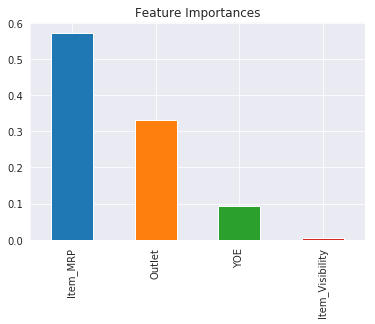

In [57]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target] + IDs]
model = RandomForestRegressor(n_estimators=400,max_depth=12, min_samples_leaf=100,n_jobs=-1)
model_prep(model, train,predictors, target, IDs)
coeff = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
coeff.plot(kind='bar', title='Feature Importances')

In [58]:
coeff

Item_MRP           0.572469
Outlet             0.329954
YOE                0.093512
Item_Visibility    0.004065
dtype: float64

In [59]:
test['predictions'] = model.predict(test[predictors])
test

,Item_Identifier,Item_MRP,Item_Visibility,Outlet_Identifier,YOE,Outlet,predictions
8523,FDW58,107.8622,0.007565,OUT049,16,9,1708.270660
8524,FDW14,87.3198,0.038428,OUT017,8,2,1326.774103
8525,NCN55,241.7538,0.099575,OUT010,17,0,489.798948
8526,FDQ58,155.0340,0.015388,OUT017,8,2,2449.097851
8527,FDY38,234.2300,0.118599,OUT027,30,5,5365.293049
8528,FDH56,117.1492,0.063817,OUT046,18,8,2048.396874
8529,FDL48,50.1034,0.082602,OUT018,6,3,681.697348
8530,FDC48,81.0592,0.015782,OUT027,30,5,2133.951529
8531,FDN33,95.7436,0.123365,OUT045,13,7,1500.143923
8532,FDA36,186.8924,0.005698,OUT017,8,2,3135.310173


In [60]:
res = model.predict(train[predictors])
res

array([4061.55085791,  640.06323713, 2180.15602862, ..., 1464.32724923,
       1301.36821866, 1190.73601276])

In [61]:
train['p'] = res
train

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Outlet_Identifier,YOE,Outlet,p
0,FDA15,249.8092,3735.1380,0.016047,OUT049,16,9,4061.550858
1,DRC01,48.2692,443.4228,0.019278,OUT018,6,3,640.063237
2,FDN15,141.6180,2097.2700,0.016760,OUT049,16,9,2180.156029
3,FDX07,182.0950,732.3800,0.017834,OUT010,17,0,489.468630
4,NCD19,53.8614,994.7052,0.009780,OUT013,28,1,457.663017
5,FDP36,51.4008,556.6088,0.057059,OUT018,6,3,715.599957
6,FDO10,57.6588,343.5528,0.012741,OUT013,28,1,470.516662
7,FDP10,107.7622,4022.7636,0.127470,OUT027,30,5,2750.993837
8,FDH17,96.9726,1076.5986,0.016687,OUT045,13,7,1584.388331
9,FDU28,187.8214,4710.5350,0.094450,OUT017,8,2,3151.806495
